In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import stemgraphic as stem

In [5]:
df = pd.read_excel('files/WHEELS.xlsx')
df

,REQUEST,MARKET,ENGINEER,ACCOUNT,LOST
0,1,7.0,6.2,0.1,no
1,2,0.4,5.2,0.1,no
2,3,2.4,4.6,0.6,no
3,4,6.2,13.0,0.8,yes
4,5,4.7,0.9,0.5,no
5,6,1.3,0.4,0.1,no
6,7,7.3,6.1,0.1,no
7,8,5.6,3.6,3.8,no
8,9,5.5,9.6,0.5,no
9,10,5.3,4.8,0.8,no


### a. Stem graphic for all department and lost for total

In [6]:
df['TOTAL'] = df['MARKET'] + df['ENGINEER'] + df['ACCOUNT']

(<Figure size 540x180 with 1 Axes>, <Axes:>)

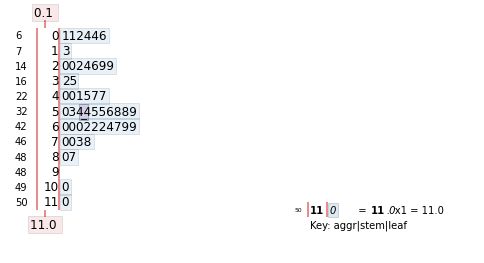

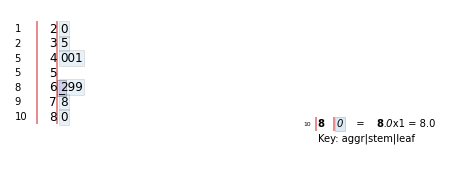

In [87]:
stem.stem_graphic(df['MARKET'], asc=False)
stem.stem_graphic(df[df['LOST'] == 'yes']['MARKET'], asc=False)

(<Figure size 540x306 with 1 Axes>, <Axes:>)

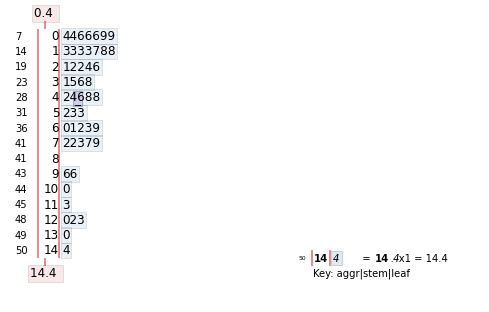

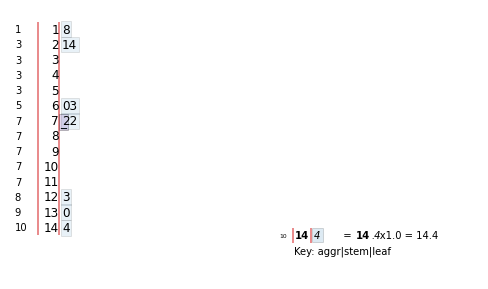

In [86]:
stem.stem_graphic(df['ENGINEER'], asc=False)
stem.stem_graphic(df[df['LOST'] == 'yes']['ENGINEER'], asc=False)

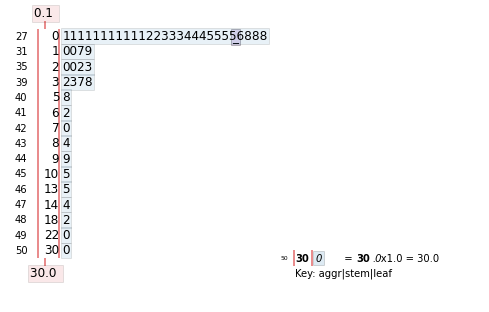

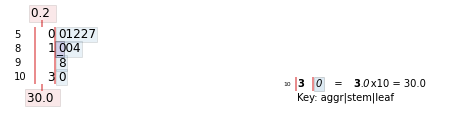

In [85]:
stem.stem_graphic(df['ACCOUNT'], asc=False, compact=True)
lost = stem.stem_graphic(df[df['LOST'] == 'yes']['ACCOUNT'], asc=False, compact=True)

(<Figure size 540x162 with 1 Axes>, <Axes:>)

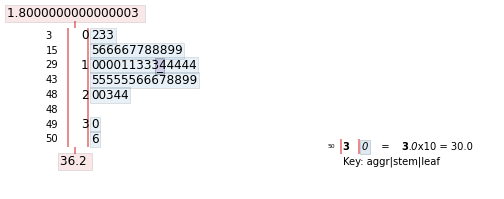

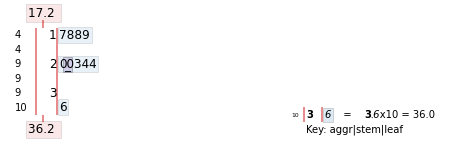

In [88]:
stem.stem_graphic(df['TOTAL'], scale=10, asc=False, break_on=5)
stem.stem_graphic(df[df['LOST'] == 'yes']['TOTAL'], scale=10, asc=False, break_on=5)

Each od three department are scattered throughout the distribution. The process time of departments do not appear to be related to whether the require is lost or not. Total processing time for lost appear to be longer than the others. If the process time can cut under than 17 days, it will reduce the number of lost.

### b. Develop max day of department

In [143]:
max_market = 6.5
max_engineer = 7
max_account = 8.5
max_total = 17

### c. Descriptive Statistic: Request, Market, Engineer, Account

In [122]:
variables = ['MARKET', 'ENGINEER', 'ACCOUNT', 'TOTAL']
df_st = pd.DataFrame({'Variable': variables, 
                      'N': 50,
                      'Mean': [np.mean(df[var]) for var in variables],
                      'StDev': [np.std(df[var], ddof=1) for var in variables],
                      'Minimum': [np.min(df[var]) for var in variables],
                      'Q1': [np.quantile(df[var], 0.25) for var in variables],
                      'Median': [np.median(df[var]) for var in variables],
                      'Q3': [np.quantile(df[var], 0.75) for var in variables],
                      'Maximum': [np.max(df[var]) for var in variables]
})
df_st

,Variable,N,Mean,StDev,Minimum,Q1,Median,Q3,Maximum
0,MARKET,50,4.766,2.583986,0.1,2.900,5.40,6.2,11.0
1,ENGINEER,50,5.044,3.834599,0.4,1.800,4.50,7.2,14.4
2,ACCOUNT,50,3.652,6.256433,0.1,0.225,0.80,3.6,30.0
3,TOTAL,50,13.462,6.820494,1.8,8.250,13.75,16.3,36.2


### d. Z score of the max day we decide

In [123]:
def z_score(x: float, x_mean: float, stdev: float) -> float:
    return (x - x_mean) / stdev

In [144]:
print(f'Marketing: {z_score(max_market, df_st["Mean"][0], df_st["StDev"][0])}')
print(f'Engineering: {z_score(max_engineer, df_st["Mean"][1], df_st["StDev"][1])}')
print(f'Accounting: {z_score(max_account, df_st["Mean"][2], df_st["StDev"][2])}')
print(f'Total: {z_score(max_total, df_st["Mean"][3], df_st["StDev"][3])}')

Marketing: 0.6710562660626934
Engineering: 0.5100924946102385
Accounting: 0.7748824169521069
Total: 0.5187307526219973


### e. Max day when z score is 3

In [159]:
def max_day(x_mean: float, z: float, stdev: float) -> float:
    return x_mean + z * stdev

In [176]:
print(f'MArketing: {max_day(df_st["Mean"][0], 3, df_st["StDev"][0])}')
print(df[df['MARKET'] > max_day(df_st["Mean"][0], 3, df_st["StDev"][0])])

print(f'\nEngineering: {max_day(df_st["Mean"][1], 3, df_st["StDev"][1])}')
print(df[df['ENGINEER'] > max_day(df_st["Mean"][1], 3, df_st["StDev"][1])])

MArketing: 12.517958014671162
Empty DataFrame
Columns: [REQUEST, MARKET, ENGINEER, ACCOUNT, LOST, TOTAL]
Index: []

Engineering: 16.547796001710896
Empty DataFrame
Columns: [REQUEST, MARKET, ENGINEER, ACCOUNT, LOST, TOTAL]
Index: []


These agree with both Chebyshev and Empirical Rules

In [177]:
print(f'Accounting: {max_day(df_st["Mean"][2], 3, df_st["StDev"][2])}')
print(df[df['ACCOUNT'] > max_day(df_st["Mean"][2], 3, df_st["StDev"][2])])

print(f'\nTotal: {max_day(df_st["Mean"][3], 3, df_st["StDev"][3])}')
print(df[df['TOTAL'] > max_day(df_st["Mean"][3], 3, df_st["StDev"][3])])

Accounting: 22.42129929215173
    REQUEST  MARKET  ENGINEER  ACCOUNT LOST  TOTAL
22       23     4.1       2.1     30.0  yes   36.2

Total: 33.92348208169662
    REQUEST  MARKET  ENGINEER  ACCOUNT LOST  TOTAL
22       23     4.1       2.1     30.0  yes   36.2


These only agree with Chebyshev Rule

### f. Max day when z score is 2

In [174]:
print(f'MArketing: {max_day(df_st["Mean"][0], 2, df_st["StDev"][0])}')
print(df[df['MARKET'] > max_day(df_st["Mean"][0], 2, df_st["StDev"][0])])

print(f'\nEngineering: {max_day(df_st["Mean"][1], 2, df_st["StDev"][1])}')
print(df[df['ENGINEER'] > max_day(df_st["Mean"][1], 2, df_st["StDev"][1])])

print(f'\nAccounting: {max_day(df_st["Mean"][2], 2, df_st["StDev"][2])}')
print(df[df['ACCOUNT'] > max_day(df_st["Mean"][2], 2, df_st["StDev"][2])])

print(f'\nTotal: {max_day(df_st["Mean"][3], 2, df_st["StDev"][3])}')
print(df[df['TOTAL'] > max_day(df_st["Mean"][3], 2, df_st["StDev"][3])])

MArketing: 9.933972009780774
    REQUEST  MARKET  ENGINEER  ACCOUNT LOST  TOTAL
30       31    11.0       1.7      3.3   no   16.0
47       48    10.0       5.3      0.1   no   15.4

Engineering: 12.713197334473932
    REQUEST  MARKET  ENGINEER  ACCOUNT LOST  TOTAL
3         4     6.2      13.0      0.8  yes   20.0
48       49     8.0      14.4      1.9  yes   24.3

Accounting: 16.16486619476782
    REQUEST  MARKET  ENGINEER  ACCOUNT LOST  TOTAL
19       20     2.9       5.3     22.0   no   30.2
22       23     4.1       2.1     30.0  yes   36.2
35       36     4.0       1.8     18.2  yes   24.0

Total: 27.10298805446441
    REQUEST  MARKET  ENGINEER  ACCOUNT LOST  TOTAL
19       20     2.9       5.3     22.0   no   30.2
22       23     4.1       2.1     30.0  yes   36.2


All agree with Chebyshev Rule but not Empirical Rule.

### g. e or f which guildline is better